In [289]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests

In [290]:
world_pop=pd.read_csv("Resources/world_population.csv",thousands=' ')
male_pop=pd.read_csv("Resources/population_male total.csv")
rural_population=pd.read_csv("Resources/Rural_population.csv")
female_pop=pd.read_csv("Resources/population_female.csv")
urban_population=pd.read_csv("Resources/urban_population.csv")



In [291]:
#total_pop= pd.to_numeric(world_pop["2015 [YR2015]"],downcast='float')

w2qtotal_pop_df=pd.DataFrame({"Country Code":world_pop["Country Code"],"Total Population 2015":world_pop["2015 [YR2015]"]})
male_df=pd.DataFrame({"Country Code":male_pop["Country Code"],"Male Population 2015(%Total)":male_pop["2015 [YR2015]"]})
female_df=pd.DataFrame({"Country Code":female_pop["Country Code"],"Female Population 2015(%Total)":female_pop["2015 [YR2015]"]})
rural_df=pd.DataFrame({"Country Code":rural_population["Country Code"],"Rural Population 2015(%Total)":rural_population["2015 [YR2015]"]})
urban_df=pd.DataFrame({"Country Code":urban_population["Country Code"],"Urban Population 2015":urban_population["2015 [YR2015]"]})

In [292]:
pop_merge1=total_pop_df.merge(male_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(female_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(rural_df,on="Country Code", how="left")
pop_merge1=pop_merge1.merge(urban_df,on="Country Code", how="left")

pop_merge1.head()

,Country Code,Total Population 2015,Male Population 2015(%Total),Female Population 2015(%Total),Rural Population 2015(%Total),Urban Population 2015
0,WLD,7357559450,50.4386316506718,49.5613683493282,46.0820124199885,3966059373
1,AFG,33736494,51.5454421553111,48.4545578446889,75.197,8367663
2,ALB,2880703,50.4854013574818,49.5145986425182,42.566,1654503
3,DZA,39871528,50.4958588121434,49.5041411878566,29.152,28248180
4,ASM,55537,..,..,12.762,48449


In [293]:
import sys
happiness=pd.read_csv("Resources/happiness/happiness_ranking2015.csv")
happiness_population=happiness.merge(pop_merge1,on="Country Code", how="left")
happiness_population=happiness_population[happiness_population["Total Population 2015"]!=".."]
#happiness_population["Total Population 2015"]=happiness_population["Total Population 2015"]
happiness_population[pd.to_numeric(happiness_population["Total Population 2015"], errors='..').isnull()]
happiness_population=happiness_population.dropna(how="any")

<function matplotlib.pyplot.show(*args, **kw)>

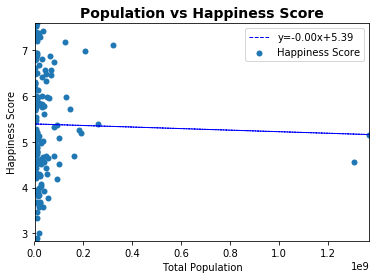

In [294]:
from matplotlib import pyplot as plt
import scipy
from scipy.stats import linregress

pop=happiness_population["Total Population 2015"].apply(lambda x: x.replace(',','')).astype(float)
#pop_norm_by_std = [number/scipy.std(pop) for number in pop]

#x_axis_pop=pop_norm_by_std
x_axis_pop=pop

# Set line
(slope_pop, intercept_pop, r_pop , p_pop, se_pop) = linregress(x_axis_pop,happiness_population["Happiness Score"] )

fit_pop= slope_pop * x_axis_pop + intercept_pop

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_pop), max(x_axis_pop))
plt.ylim(min(happiness_population["Happiness Score"]),max(happiness_population["Happiness Score"]))
plt.scatter(x_axis_pop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_pop, fit_pop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_pop,intercept_pop))
plt.ylabel("Happiness Score")
plt.xlabel("Total Population")
plt.legend()

plt.show

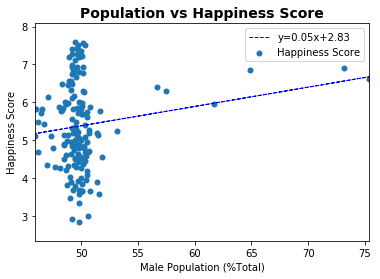

In [298]:
### Plotting with male_population data

male_pop=happiness_population["Male Population 2015(%Total)"].astype(float)

#male_pop_norm_by_std = [number/scipy.std(male_pop) for number in male_pop]

#x_axis_mpop=male_pop_norm_by_std

x_axis_mpop = male_pop


# Set line
(slope_mpop, intercept_mpop, r_mpop , p_mpop, se_mpop) = linregress(x_axis_mpop,happiness_population["Happiness Score"] )

fit_mpop= slope_mpop * x_axis_mpop + intercept_mpop


plt.title("Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_mpop), max(x_axis_mpop))
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(x_axis_mpop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_mpop, fit_mpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_mpop,intercept_mpop))
plt.ylabel("Happiness Score")
plt.xlabel("Male Population (%Total)")
plt.legend()

plt.show()

<class 'pandas.core.series.Series'>


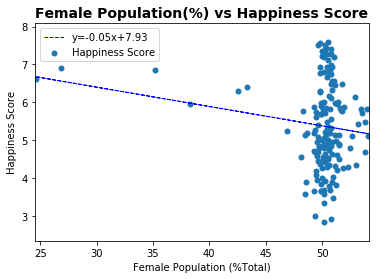

In [299]:
female_pop=happiness_population["Female Population 2015(%Total)"].astype(float)

x_axis_fpop=female_pop
print(type(x_axis_fpop))

# Set line
(slope_fpop, intercept_fpop, r_fpop , p_fpop, se_fpop) = linregress(x_axis_fpop,happiness_population["Happiness Score"] )

fit_fpop= slope_fpop * x_axis_fpop + intercept_fpop


plt.title("Female Population(%) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(female_pop-0.1), max(female_pop)+0.1,)
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(female_pop,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(female_pop, fit_fpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_fpop,intercept_fpop))
plt.ylabel("Happiness Score")
plt.xlabel("Female Population (%Total)")
plt.legend()

plt.show()

<class 'pandas.core.series.Series'>


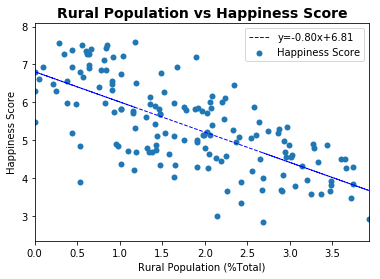

In [300]:
rural_pop=happiness_population["Rural Population 2015(%Total)"].astype(float)
rural_norm_by_std = [number/scipy.std(rural_pop) for number in rural_pop]
x_axis_rpop=rural_norm_by_std
print(type(x_axis_fpop))

# Set line
(slope_rpop, intercept_rpop, r_rpop , p_rpop, se_rpop) = linregress(rural_norm_by_std,happiness_population["Happiness Score"] )
#fit_rpop= slope_rpop * rural_norm_by_std + intercept_rpop


plt.title("Rural Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(rural_norm_by_std), max(rural_norm_by_std))
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(rural_norm_by_std,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(rural_norm_by_std, fit_rpop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_rpop,intercept_rpop))
plt.ylabel("Happiness Score")
plt.xlabel("Rural Population (%Total)")
plt.legend()

plt.show()

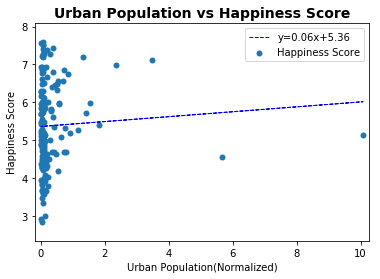

In [301]:
from matplotlib import pyplot as plt
import scipy
from scipy.stats import linregress

urban_pop=happiness_population["Urban Population 2015"].astype(float)

urban_norm_by_std = [number/scipy.std(urban_pop) for number in urban_pop]

x_axis_upop=urban_norm_by_std

#print(x_axis_fpop)

# Set line
(slope_upop, intercept_upop, r_upop , p_upop, se_upop) = linregress(urban_norm_by_std,happiness_population["Happiness Score"] )
#fit_upop= slope_upop * x_axis_upop + intercept_upop


plt.title("Urban Population vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(urban_norm_by_std)-0.2, max(urban_norm_by_std)+0.2)
plt.ylim(min(happiness_population["Happiness Score"]-0.5),max(happiness_population["Happiness Score"])+0.5)
plt.scatter(urban_norm_by_std,happiness_population["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(urban_norm_by_std, fit_upop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_upop,intercept_upop))
plt.ylabel("Happiness Score")
plt.xlabel("Urban Population(Normalized)")
plt.legend()

plt.show()

In [302]:
population_stats_df=pd.DataFrame({"Factors":['Total Population','Male Population 2015(%Total)', 'Female Population 2015(%Total)',
                                 'Rural Population 2015(%Total)','Urban Population'],
                      "R Value":[r_pop,r_mpop,r_fpop,r_rpop,r_upop],
                      "P Value":[p_pop,p_mpop,p_fpop,p_rpop,p_upop],
                      "Standard Error":[se_pop,se_mpop,se_fpop,se_rpop,se_upop]})
population_stats_df

,Factors,R Value,P Value,Standard Error
0,Total Population,-0.023026,7.768263e-01,5.958292e-10
1,Male Population 2015(%Total),0.155135,5.471449e-02,2.636410e-02
2,Female Population 2015(%Total),-0.155135,5.471449e-02,2.636410e-02
3,Rural Population 2015(%Total),-0.697288,9.629297e-24,6.663095e-02
4,Urban Population,0.056627,4.854555e-01,9.280817e-02
